# Evolutionary Salesman Algorithm Demonstration
This Jupyter Notebook will try to demonstrate the evolutionary algorithm developed to solve the salesman problem.

Firstly let's import some modules (including our own):

In [1]:
import lib.evo_salesman as evo
import lib.misc as msc

Now let's set our parameters with `set_parameters()`. These will be changed later on to compare different parameters when running the algorithm.

In [2]:
num_cities=10
num_generations=20
num_individuals=25
mutation_prob=0.8
old_generation_ratio=0.5
map_size=100
rand_seed=-1
evo.set_parameters(num_cities, num_generations, num_individuals, mutation_prob, 
               old_generation_ratio, map_size, rand_seed)

Now we can generate and plot the cities so we can get a better look at them.

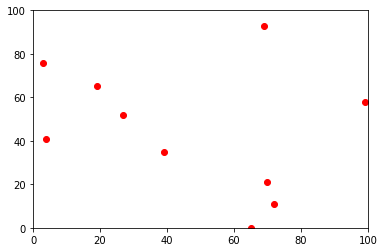

In [3]:
evo.create_cities()
cities = evo.get_cities()
msc.plot_cities(cities, map_size)

Finally, we can run the simulation and get the performance and history of every generation.

In [4]:
evo.run_simulation()
generations = evo.get_generations()

Let's see what was the shortest distance for each generation.

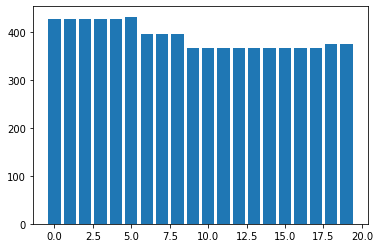

In [5]:
msc.plot_best_distance_per_generation(generations)